# Calculate the number of observations that went into detecting each waterbody <img align="right" src="../../../Supplementary_data/dea_logo.jpg">

* **Compatibility:** Notebook currently compatible with the `NCI` environment only. You can make this notebook `Sandbox` compatible by pointing it to the DEA Waterbodies timeseries located in AWS.
* **Products used:** 
None.
* **Prerequisites:** This notebook explores the individual waterbody timeseries csvs contained within the DEA Waterbodies dataset. It has been designed with that very specific purpose in mind, and is not intended as a general analysis notebook. 

## Description
This notebook loops through all of the individal waterbodies timeseries produced within DEA Waterbodies, and generates statistics on the number of observations within each of the individual records. 

1. Load the required python modules
2. Set up the directory where the timeseries data are all located
3. Glob through that directory to get a list of all the files to loop through
4. Loop through each file and make a note of its length
5. Calculate length statistics

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Import Python packages that are used for the analysis.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import xarray as xr
import pandas as pd
import glob

Populating the interactive namespace from numpy and matplotlib


### Analysis parameters

* `TimeseriesDir`: Folder where the DEA Waterbodies timeseries are saved
* `AnalysisStartDate`: e.g. `'1985-01-01'`. Date to start counting observations from. The dataset begins in 1987. If you want to select a shorter date range over which to count observations, set this data to your custom range. 
* `AnalysisEndDate`: e.g. `'2019-01-01'`. Final date to finish counting observations.  The dataset is being continually updated. If you want to select a shorter date range over which to count observations, set this data to your custom range. 

In [2]:
TimeseriesDir = '/g/data/r78/cek156/dea-notebooks/Scientific_workflows/DEAWaterbodies/timeseries_aus_uid'

AnalysisStartDate = '1985-01-01'
AnalysisEndDate = '2019-01-01'

## Get a list of all of the csv files

In [3]:
CSVFiles = glob.glob(f'{TimeseriesDir}/**/*.csv', recursive=True)

## Open each file, then work out how many observations occur between the observation period

In [4]:
AllObs = []
for FileName in CSVFiles:
    try:
        TimeHistory = pd.read_csv(FileName)
        TimeHistory['Observation Date'] = pd.to_datetime(TimeHistory['Observation Date'])
        NumObs = len(TimeHistory[(TimeHistory['Observation Date'] > AnalysisStartDate) & 
                                 (TimeHistory['Observation Date'] < AnalysisEndDate)])
        if NumObs < 50:
            print(FileName)
        AllObs.append(NumObs)
    except:
        print(FileName +' did not work')

/g/data/r78/cek156/dea-notebooks/Scientific_workflows/DEAWaterbodies/timeseries_aus_uid/rhvj/rhvj0znm9.csv did not work
/g/data/r78/cek156/dea-notebooks/Scientific_workflows/DEAWaterbodies/timeseries_aus_uid/rhg9/rhg9rbvhc.csv did not work
/g/data/r78/cek156/dea-notebooks/Scientific_workflows/DEAWaterbodies/timeseries_aus_uid/r7cd/r7cd57z1h.csv did not work
/g/data/r78/cek156/dea-notebooks/Scientific_workflows/DEAWaterbodies/timeseries_aus_uid/r1r1/r1r1hjuyv.csv did not work
/g/data/r78/cek156/dea-notebooks/Scientific_workflows/DEAWaterbodies/timeseries_aus_uid/r764/r7648hec6.csv did not work
/g/data/r78/cek156/dea-notebooks/Scientific_workflows/DEAWaterbodies/timeseries_aus_uid/r30n/r30nf45jq.csv did not work
/g/data/r78/cek156/dea-notebooks/Scientific_workflows/DEAWaterbodies/timeseries_aus_uid/r5mw/r5mwkrvkb.csv did not work
/g/data/r78/cek156/dea-notebooks/Scientific_workflows/DEAWaterbodies/timeseries_aus_uid/rk22/rk22bz0n6.csv did not work
/g/data/r78/cek156/dea-notebooks/Scienti

## Calculate some statistics on observation length

You can edit these cells to generate different length statistics.

In [5]:
AllObs.sort()
AllObsNP = np.array(AllObs)

<IPython.core.display.Javascript object>


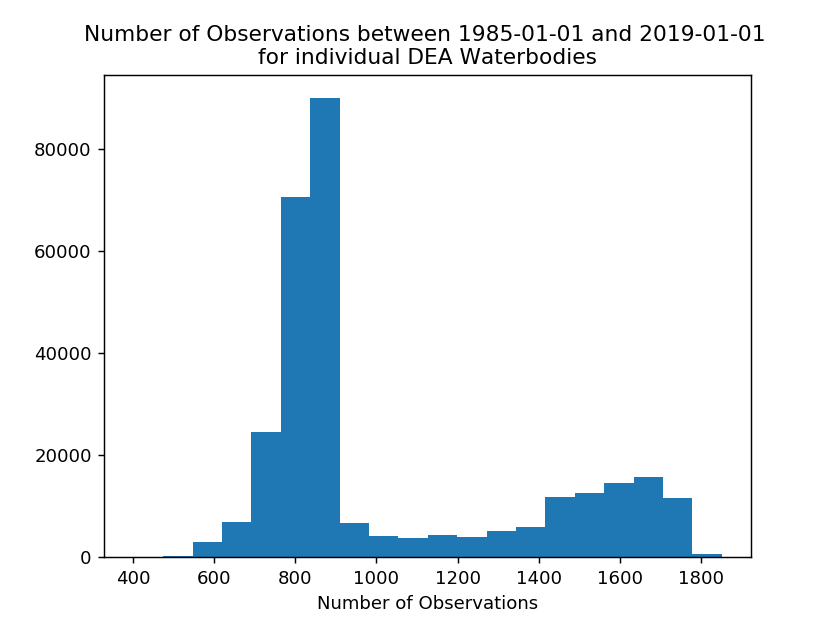

Text(0.5, 1.0, 'Number of Observations between 1985-01-01 and 2019-01-01 \nfor individual DEA Waterbodies')

In [15]:
plt.hist(AllObsNP, bins=20)
plt.xlabel(f'Number of Observations')
plt.title(f'Number of Observations between {AnalysisStartDate} and {AnalysisEndDate} \n'
          'for individual DEA Waterbodies')

### Interrogate the length some more
You can change the statistic here depending on what you're interested in.

In [16]:
AllObsNP.min()

402

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** January 2020

**Compatible datacube version:** N/A

## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)